### Validation and cleaning of data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('darkgrid')
colors = ['#1565c0', '#862C92', '#00BCD4', '#2196f3','#64b5f6', '#bbdefb', '#004173']
sns.set_palette(colors)

In [4]:
income_expenditure_df = pd.read_csv('Income-Expenditure.csv')
dietary_habits_df = pd.read_csv('Dietary Habits Survey Data.csv')
food_description_df = pd.read_csv('Food_Prices_Dimension_Table.csv')
food_prices_df = pd.read_csv('Food Prices.csv')

#### Income and expenditure dataframe

In [5]:
income_expenditure_df.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [6]:
income_expenditure_df.shape

(50, 7)

In [7]:
income_expenditure_df.dtypes

Mthly_HH_Income              int64
Mthly_HH_Expense             int64
No_of_Fly_Members            int64
Emi_or_Rent_Amt              int64
Annual_HH_Income             int64
Highest_Qualified_Member    object
No_of_Earning_Members        int64
dtype: object

In [8]:
income_expenditure_df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [9]:
income_expenditure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [10]:
income_expenditure_df.isna().sum()

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

#### Dietary habits dataframe

In [11]:
dietary_habits_df.head()

,Age,Gender,How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten),What would best describe your diet:,Choose all that apply: [I skip meals],Choose all that apply: [I experience feelings of hunger during the day],Choose all that apply: [I consult a nutritionist/dietician],Choose all that apply: [I cook my own meals],What would you consider to be the main meal of YOUR day?,What does your diet mostly consist of and how is it prepared?,...,What is your weekly food intake frequency of the following food categories: [Meat],What is your weekly food intake frequency of the following food categories: [Seafood ],How frequently do you consume these beverages [Tea],How frequently do you consume these beverages [Coffee],How frequently do you consume these beverages [Aerated (Soft) Drinks],How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)],"How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]",How frequently do you consume these beverages [Alcoholic Beverages],"What is your water consumption like (in a day, 1 cup=250ml approx)",
0,18-24,Male,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Often,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups,NaN
1,18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,...,Never,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups,NaN
2,45-54,Male,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,...,Never,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups,NaN
3,18-24,Male,2,Non-Vegetarian,Often,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Once a day,Few times a week,Few times a week,Once a day,Once a month,Once a month,Few times a week,Never,7-10 cups,NaN
4,18-24,Female,3,Eggetarian (Vegetarian who consumes egg and eg...,Sometimes,Sometimes,Never,Often,Breakfast,Freshly home-cooked produce,...,Never,Never,Never,Never,Once a month,Once a month,Once a day,Once a month,4-6 cups,NaN


In [12]:
dietary_habits_df.shape

(78, 27)

In [13]:
dietary_habits_df.dtypes

Age                                                                                                                                            object
Gender                                                                                                                                         object
How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)      int64
What would best describe your diet:                                                                                                            object
Choose all that apply: [I skip meals]                                                                                                          object
Choose all that apply: [I experience feelings of hunger during the day]                                                                        object
Choose all that apply: [I consult a nutritionist/dietician]                                         

In [14]:
dietary_habits_df.columns

Index(['Age', 'Gender',
       'How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)',
       'What would best describe your diet:',
       'Choose all that apply: [I skip meals]',
       'Choose all that apply: [I experience feelings of hunger during the day]',
       'Choose all that apply: [I consult a nutritionist/dietician]',
       'Choose all that apply: [I cook my own meals]',
       'What would you consider to be the main meal of YOUR day?',
       'What does your diet mostly consist of and how is it prepared?',
       'How many times a week do you order-in or go out to eat?',
       'Are you allergic to any of the following? (Tick all that apply)',
       'What is your weekly food intake frequency of the following food categories: [Sweet foods]',
       'What is your weekly food intake frequency of the following food categories: [Salty foods]',
       'What is your weekly food intake frequen

In [15]:
dietary_habits_df.describe()

,How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten),How many times a week do you order-in or go out to eat?,
count,78.000000,78.000000,0.0
mean,3.128205,1.897436,NaN
std,0.651850,1.223044,NaN
min,2.000000,1.000000,NaN
25%,3.000000,1.000000,NaN
50%,3.000000,1.500000,NaN
75%,3.000000,2.000000,NaN
max,5.000000,7.000000,NaN


In [16]:
dietary_habits_df.isna().sum()

Age                                                                                                                                            0
Gender                                                                                                                                         0
How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)     0
What would best describe your diet:                                                                                                            0
Choose all that apply: [I skip meals]                                                                                                          0
Choose all that apply: [I experience feelings of hunger during the day]                                                                        0
Choose all that apply: [I consult a nutritionist/dietician]                                                                       

In [17]:
dietary_habits_df = dietary_habits_df.drop(columns=[' '])

In [18]:
for col in ['Age','Gender',
'How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)',
'What would best describe your diet:']:
    print("--------------------------------")
    print(dietary_habits_df[col].value_counts())

--------------------------------
Age
18-24       49
Under 18    15
45-54        8
Above 65     3
35-44        3
Name: count, dtype: int64
--------------------------------
Gender
Male      40
Female    38
Name: count, dtype: int64
--------------------------------
How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)
3    50
4    16
2    10
5     2
Name: count, dtype: int64
--------------------------------
What would best describe your diet:
Non-Vegetarian                                                                  29
Vegetarian (No egg or meat)                                                     22
Eggetarian (Vegetarian who consumes egg and egg products)                       15
Pollotarian (Vegetarian who consumes poultry and white meat but no red meat)     6
Pescatarian (Vegetarian who consumes only seafood)                               3
Pollo-pescetarian (Vegetarian who consumes seafood and w

In [19]:
for col_2 in ['Choose all that apply: [I skip meals]',
                'Choose all that apply: [I experience feelings of hunger during the day]',
                'Choose all that apply: [I consult a nutritionist/dietician]',
                'Choose all that apply: [I cook my own meals]',
                'What would you consider to be the main meal of YOUR day?',
                'What does your diet mostly consist of and how is it prepared?']:
        print("------------------------------------------")
        print(dietary_habits_df[col_2].value_counts())

------------------------------------------
Choose all that apply: [I skip meals]
Rarely             31
Sometimes          23
Never              14
Often               8
Very frequently     2
Name: count, dtype: int64
------------------------------------------
Choose all that apply: [I experience feelings of hunger during the day]
Sometimes          32
Often              19
Rarely             17
Never               6
Very frequently     4
Name: count, dtype: int64
------------------------------------------
Choose all that apply: [I consult a nutritionist/dietician]
Never        63
Rarely       12
Sometimes     2
Often         1
Name: count, dtype: int64
------------------------------------------
Choose all that apply: [I cook my own meals]
Sometimes          20
Rarely             19
Never              15
Very frequently    15
Often               9
Name: count, dtype: int64
------------------------------------------
What would you consider to be the main meal of YOUR day?
Lunch        44

In [20]:
for col_3 in ['How many times a week do you order-in or go out to eat?',
              'Are you allergic to any of the following? (Tick all that apply)']:
       print("------------------------------------------") 
       print(dietary_habits_df[col_3].value_counts())

------------------------------------------
How many times a week do you order-in or go out to eat?
1    39
2    22
3     9
4     4
5     3
7     1
Name: count, dtype: int64
------------------------------------------
Are you allergic to any of the following? (Tick all that apply)
I do not have any allergies    68
Milk                            2
Onion                           1
Curd                            1
Leafy Vegetables                1
Peanuts and Tree Nuts           1
Fish                            1
Deep Fried Food                 1
Corn                            1
Shellfish, Eggplant             1
Name: count, dtype: int64


In [21]:
for col_4 in ['What is your weekly food intake frequency of the following food categories: [Sweet foods]',
              'What is your weekly food intake frequency of the following food categories: [Salty foods]',
              'What is your weekly food intake frequency of the following food categories: [Fresh fruit]',
              'What is your weekly food intake frequency of the following food categories: [Fresh vegetables]',
              'What is your weekly food intake frequency of the following food categories: [Oily, fried foods]',
              'What is your weekly food intake frequency of the following food categories: [Meat]',
              'What is your weekly food intake frequency of the following food categories: [Seafood ]']:
       print("------------------------------------------") 
       print(dietary_habits_df[col_4].value_counts())

------------------------------------------
What is your weekly food intake frequency of the following food categories: [Sweet foods]
Few times a week       31
Once a day             21
Once a month           13
Several times a day     6
Never                   4
Often                   1
Less often              1
In every meal           1
Name: count, dtype: int64
------------------------------------------
What is your weekly food intake frequency of the following food categories: [Salty foods]
Few times a week       25
Several times a day    17
Once a day             17
In every meal          11
Once a month            4
Never                   3
Often                   1
Name: count, dtype: int64
------------------------------------------
What is your weekly food intake frequency of the following food categories: [Fresh fruit]
Once a day             34
Several times a day    16
Few times a week       13
In every meal           8
Once a month            4
Less often              2
Nev

In [22]:
for col_5 in ['How frequently do you consume these beverages [Tea]',
                'How frequently do you consume these beverages [Coffee]',
                'How frequently do you consume these beverages [Aerated (Soft) Drinks]',
                'How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)]',
                'How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]',
                'How frequently do you consume these beverages [Alcoholic Beverages]',
                'What is your water consumption like (in a day, 1 cup=250ml approx)']:
        print("------------------------------------------") 
        print(dietary_habits_df[col_5].value_counts())

------------------------------------------
How frequently do you consume these beverages [Tea]
Never                  31
Once a day             23
Once a month           11
Few times a week       10
Several times a day     2
Less often              1
Name: count, dtype: int64
------------------------------------------
How frequently do you consume these beverages [Coffee]
Never                  21
Few times a week       20
Once a day             17
Once a month           14
Several times a day     5
Less often              1
Name: count, dtype: int64
------------------------------------------
How frequently do you consume these beverages [Aerated (Soft) Drinks]
Once a month        33
Never               23
Few times a week    17
Once a day           3
Often                1
Less often           1
Name: count, dtype: int64
------------------------------------------
How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)]
Few times a week       28
Once a month       

#### Food description dataframe

In [23]:
food_description_df.head(10)

,EFPG_code,EFPG_name,Tier 1 group,Tier 2 group
0,10000,Whole-grain breads,Grains,"Whole-grain breads, cereal, rice, pasta, and f..."
1,10025,Whole-grain rice and pasta,Grains,"Whole-grain breads, cereal, rice, pasta, and f..."
2,10050,Whole-grain breakfast grains,Grains,"Whole-grain breads, cereal, rice, pasta, and f..."
3,10075,"Whole-grain flour, bread mixes, and frozen dough",Grains,"Whole-grain breads, cereal, rice, pasta, and f..."
4,15000,Non-whole-grain breads,Grains,"Non-whole-grain breads, cereal, rice, pasta, a..."
5,15025,Non-whole-grain rice and pasta,Grains,"Non-whole-grain breads, cereal, rice, pasta, a..."
6,15050,Non-whole-grain breakfast grains,Grains,"Non-whole-grain breads, cereal, rice, pasta, a..."
7,15075,"Non-whole-grain flour, bread mixes, and frozen...",Grains,"Non-whole-grain breads, cereal, rice, pasta, a..."
8,20000,"Potatoes, fresh",Vegetables,Potatoes
9,20075,"Potatoes, canned",Vegetables,Potatoes


In [24]:
food_description_df.shape

(90, 4)

In [25]:
food_description_df.dtypes

EFPG_code        int64
EFPG_name       object
Tier 1 group    object
Tier 2 group    object
dtype: object

In [26]:
duplicate_code = food_description_df.duplicated(subset='EFPG_code', keep=False)
food_description_df[duplicate_code]

,EFPG_code,EFPG_name,Tier 1 group,Tier 2 group
57,54550,Nut and seed butters and spreads,Meat and Protein Foods,"Nuts, nut butters, and seeds"
58,54550,"Bacon, sausage, and lunch meats",Meat and Protein Foods,"Bacon, sausage, and lunch meats"


In [27]:
food_description_df.isna().sum()

EFPG_code       0
EFPG_name       0
Tier 1 group    0
Tier 2 group    0
dtype: int64

In [28]:
for col_food in ['Tier 1 group']:
    print(f"Names of foods group 1: {food_description_df[col_food].unique()}")
    print("------------------------------------------------")
    print(f"Number of diferent foods group 1: {food_description_df[col_food].nunique()}")

Names of foods group 1: ['Grains' 'Vegetables' 'Fruit' 'Dairy' 'Meat and Protein Foods'
 'Prepared meals, sides, and salads' 'Other foods']
------------------------------------------------
Number of diferent foods group 1: 7


In [29]:
for col_food in ['Tier 2 group']:
    print(f"Names of foods group 2: {food_description_df[col_food].unique()}")
    print("-------------------------------------------------")
    print(f"Number of diferent foods group 2: {food_description_df[col_food].nunique()}")

Names of foods group 2: ['Whole-grain breads, cereal, rice, pasta, and flours'
 'Non-whole-grain breads, cereal, rice, pasta, and flours' 'Potatoes'
 'Other starchy vegetables' 'Tomatoes' 'Other red and orange vegetables'
 'Dark green' 'Beans, lentils, peas, and legumes' 'Other/mixed vegetables'
 'Whole fruit' '100% fruit and vegetable juices'
 'Whole milk, yogurt, and cream'
 'Reduced-fat, low-fat, and skim milk, cream, and yogurt' 'Cheese'
 'Beef, pork, lamb, veal and game' 'Chicken, turkey, and game birds'
 'Fish and seafood' 'Nuts, nut butters, and seeds'
 'Bacon, sausage, and lunch meats' 'Egg and egg substitutes'
 'Tofu and meat substitutes' 'Ready-to-eat foods'
 'Frozen/refrigerated ready-to-heat foods'
 'Shelf-stable ready-to-heat foods and soups' 'Shelf-stable meal kits'
 'Fats, oils, and salad dressings'
 'Gravies, sauces, condiments, and spices' 'Beverages'
 'Desserts, sweets, and candies' 'Breakfast cereals' 'Savory snacks'
 'Vitamins and meal supplements' 'Baby food' 'Infa

#### Food prices dataframe

In [30]:
food_prices_df.head()

,Year,Month,EFPG_code,Metroregion_code,Attribute,Value
0,2012,1,10000,National,Total weighted monthly sales in U.S. dollars,2.493734e+08
1,2012,1,10000,National,Total weighted monthly quantities in grams,4.875195e+10
2,2012,1,10000,National,Total unweighted monthly sales in U.S. dollars,1.629852e+08
3,2012,1,10000,National,Total unweighted monthly quantities in grams,3.217558e+10
4,2012,1,10000,National,Number of stores in geographic area,4.178100e+04


In [31]:
food_prices_df.shape

(1020600, 6)

In [32]:
food_prices_df.dtypes

Year                  int64
Month                 int64
EFPG_code             int64
Metroregion_code     object
Attribute            object
Value               float64
dtype: object

In [33]:
food_prices_df.isna().sum()

Year                0
Month               0
EFPG_code           0
Metroregion_code    0
Attribute           0
Value               0
dtype: int64

In [34]:
for col_food_price in ['Year', 'Month','Metroregion_code','Attribute']:
    print("-------------------------------------")
    print(food_prices_df[col_food_price].unique())

-------------------------------------
[2012 2013 2014 2015 2016 2017 2018]
-------------------------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12]
-------------------------------------
['National' 'Census Region 1: Northeast' 'Census Region 2: Midwest'
 'Census Region 3: South' 'Census Region 4: West'
 'Atlanta-Sandy Springs-Roswell, GA' 'Boston-Cambridge-Newton, MA-NH'
 'Chicago-Naperville-Elgin, IL-IN-WI' 'Dallas-Fort Worth-Arlington, TX'
 'Detroit-Warren-Dearborn, MI' 'Houston-The Woodlands-Sugar Land, TX'
 'Los Angeles-Long Beach-Anaheim, CA'
 'Miami-Fort Lauderdale-West Palm Beach, FL'
 'New York-Newark-Jersey City, NY-NJ-PA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD' '0' '1' '2' '3' '4']
-------------------------------------
['Total weighted monthly sales in U.S. dollars'
 'Total weighted monthly quantities in grams'
 'Total unweighted monthly sales in U.S. dollars'
 'Total unweighted monthly quantities in grams '
 'Number of stores in geographic area'
 'Weighted mean uni

In [35]:
food_prices_df['Value'].describe()

count    1.020600e+06
mean     4.452703e+09
std      4.794131e+10
min      4.560000e-05
25%      5.754512e-01
50%      1.109000e+03
75%      5.160352e+07
max      3.340000e+12
Name: Value, dtype: float64

### Analysis

##### Income vs Healthy and Unhealthy habits

In [36]:
survey_data = dietary_habits_df.copy()

In [37]:
# Organizing columns
healthy_columns = ['What is your weekly food intake frequency of the following food categories: [Fresh fruit]',
                'What is your weekly food intake frequency of the following food categories: [Fresh vegetables]',
                'What is your weekly food intake frequency of the following food categories: [Seafood ]']

unhealthy_columns = ['How frequently do you consume these beverages [Aerated (Soft) Drinks]',
                'How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]',
                'How frequently do you consume these beverages [Alcoholic Beverages]',
                'What is your weekly food intake frequency of the following food categories: [Sweet foods]',
                'What is your weekly food intake frequency of the following food categories: [Oily, fried foods]',
                'What is your weekly food intake frequency of the following food categories: [Salty foods]']

In [38]:
# Turning categorical responses into numbers
def responses_frecuency(values):
    frecuencies = {
        'Never': 0,
        'Less often': 1,
        'Once a month': 2,
        'Few times a week': 3,
        'Once a day': 4,
        'Often': 5,
        'Several times a day': 6,
        'In every meal': 7,
        'With every meal': 7}
    return frecuencies.get(values, None)

for column_change in healthy_columns + unhealthy_columns:
    survey_data[column_change] = survey_data[column_change].map(responses_frecuency)

In [39]:
# Creating indexes
survey_data['Healthy_eating_score'] = survey_data[healthy_columns].sum(axis=1)
survey_data['Unhealthy_eating_score'] = survey_data[unhealthy_columns].sum(axis=1)

In [40]:
survey_data[['Age','Healthy_eating_score', 'Unhealthy_eating_score']].head(10)

,Age,Healthy_eating_score,Unhealthy_eating_score
0,18-24,10,8
1,18-24,6,25
2,45-54,19,15
3,18-24,16,16
4,18-24,11,17
5,18-24,9,18
6,18-24,14,10
7,Above 65,17,20
8,Above 65,11,19
9,Under 18,13,19


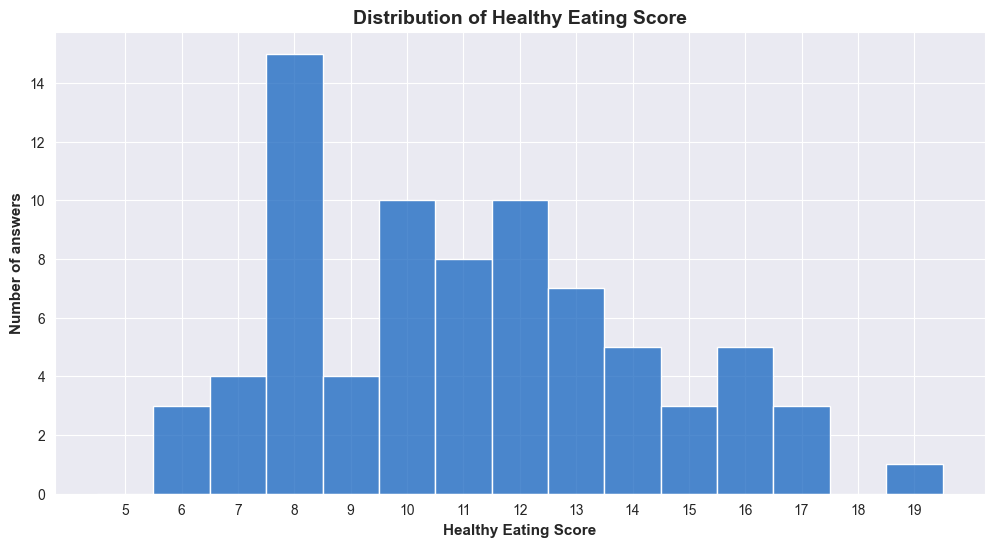

In [41]:
max_score_healthy = survey_data['Healthy_eating_score'].max()
plt.figure(figsize=(12,6))
sns.histplot(data=survey_data, x='Healthy_eating_score', bins=np.arange(5, max_score_healthy +2)-0.5, kde=False)
plt.title("Distribution of Healthy Eating Score", fontsize=14, weight="bold")
plt.xlabel("Healthy Eating Score", fontsize=11, weight="bold")
plt.xticks(range(5, max_score_healthy +1))
plt.ylabel("Number of answers", fontsize=11, weight="bold")
plt.show()

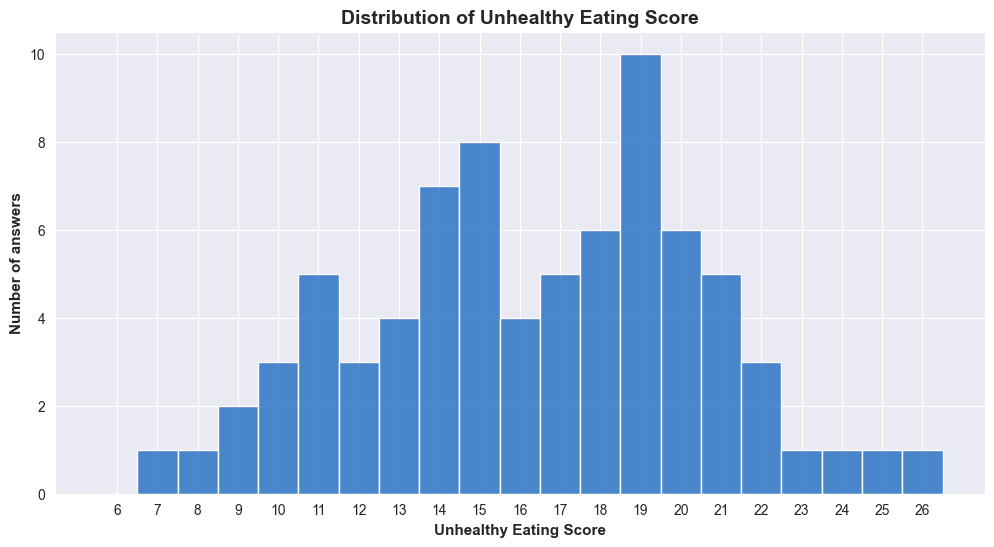

In [42]:
max_score_unhealthy = survey_data['Unhealthy_eating_score'].max()
plt.figure(figsize=(12,6))
sns.histplot(data=survey_data, x='Unhealthy_eating_score', bins=np.arange(6, max_score_unhealthy +2)-0.5, kde=False)
plt.title("Distribution of Unhealthy Eating Score", fontsize=14, weight="bold")
plt.xlabel("Unhealthy Eating Score", fontsize=11, weight="bold")
plt.xticks(range(6, max_score_unhealthy +1))
plt.ylabel("Number of answers", fontsize=11, weight="bold")
plt.show()

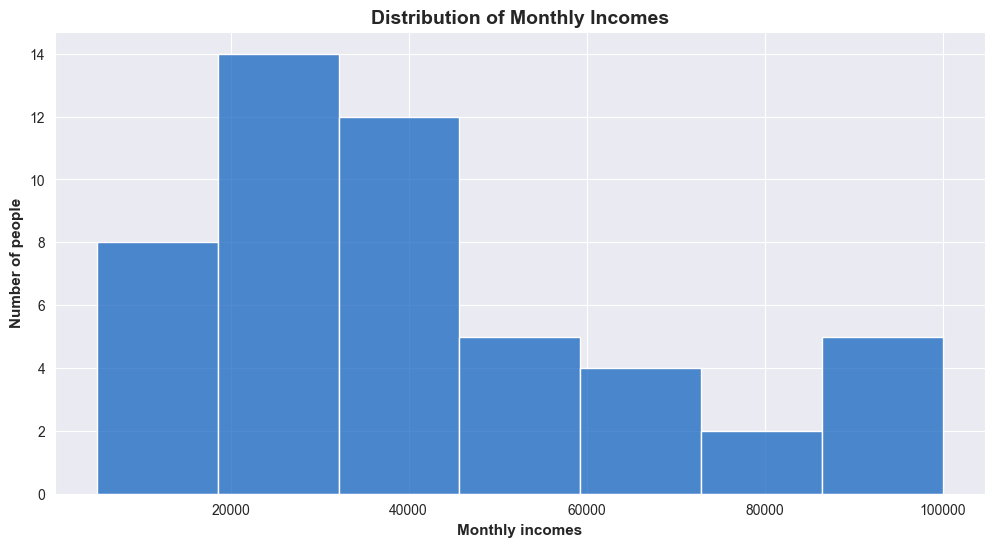

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(data=income_expenditure_df, x='Mthly_HH_Income')
plt.title("Distribution of Monthly Incomes", fontsize=14, weight="bold")
plt.xlabel("Monthly incomes", fontsize=11, weight="bold")
plt.ylabel("Number of people", fontsize=11, weight="bold")
plt.show()

In [44]:
# Grouping monthly household income column
ranges_income = [5000, 23000, 35000, 50000, 100000]
names_income = ['Low', 'Medium', 'High', 'Very High']

income_expenditure_df['Group_incomes'] = pd.cut(income_expenditure_df['Mthly_HH_Income']\
                                                ,bins=ranges_income, labels=names_income, include_lowest=True)

In [45]:
incomes_group = (income_expenditure_df.groupby('Group_incomes', observed=True).size().reset_index(name='count'))
incomes_group_sort = incomes_group.sort_values('count', ascending=False)

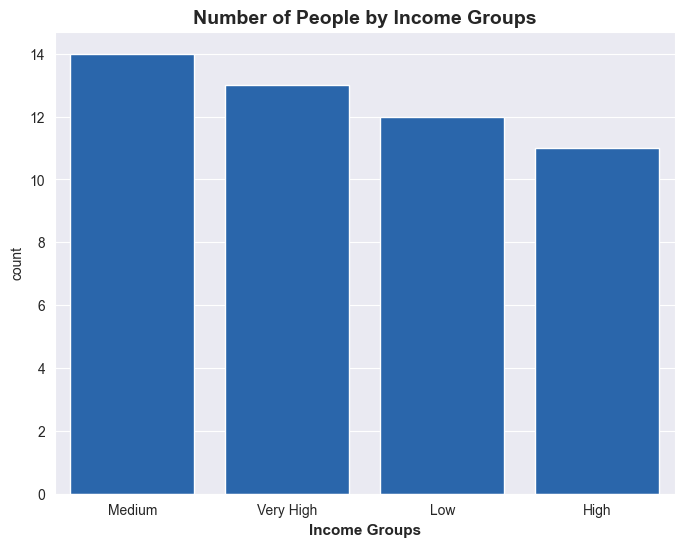

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(data=incomes_group_sort, x='Group_incomes', y='count', order=incomes_group_sort['Group_incomes'])
plt.title("Number of People by Income Groups", fontsize=14, weight="bold")
plt.xlabel("Income Groups", fontsize=11, weight="bold")
plt.show()

In [47]:
# Mean of each column based on Group Incomes
incomes_summary = income_expenditure_df.groupby('Group_incomes', observed=True).agg({
    'Mthly_HH_Income': 'mean',
    'Mthly_HH_Expense': 'mean', 
    'No_of_Fly_Members': 'mean',
    'Emi_or_Rent_Amt': 'mean',
    'Annual_HH_Income': 'mean',
    'No_of_Earning_Members': 'mean'}).reset_index()
incomes_summary

,Group_incomes,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,Low,14291.666667,11541.666667,3.000000,5916.666667,173250.000000,1.166667
1,Medium,28992.857143,14885.714286,4.000000,1035.714286,347422.285714,1.357143
2,High,44272.727273,18363.636364,4.545455,954.545455,525436.363636,1.545455
3,Very High,77961.538462,30153.846154,4.692308,4384.615385,906018.461538,1.769231


##### Frecuency of consumption of Healthy foods

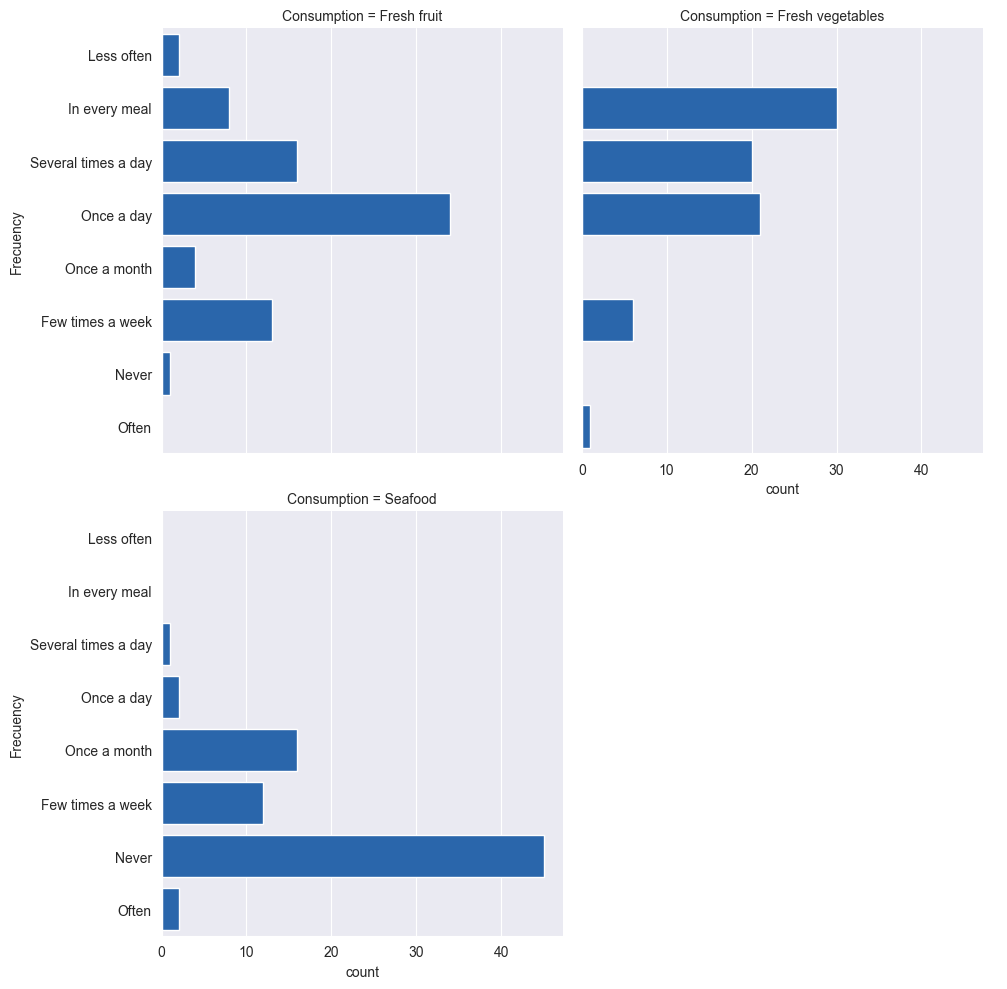

In [48]:
# Names of original columns
healthy_food = [
    'What is your weekly food intake frequency of the following food categories: [Fresh fruit]',
    'What is your weekly food intake frequency of the following food categories: [Fresh vegetables]',
    'What is your weekly food intake frequency of the following food categories: [Seafood ]']

# Change name of columns
short_names_cols = {
    healthy_food[0]: "Fresh fruit",
    healthy_food[1]: "Fresh vegetables",
    healthy_food[2]: "Seafood"}

# Transforming in long format
healthy_cols_long = dietary_habits_df.melt(value_vars= healthy_food, var_name='Consumption', value_name='Frecuency')

# Replacing long names
healthy_cols_long['Consumption'] = healthy_cols_long['Consumption'].map(short_names_cols)

# Graph by frecuency
sns.catplot(data=healthy_cols_long, y='Frecuency', kind='count', col='Consumption', col_wrap=2)
plt.show()

##### Consumption of water

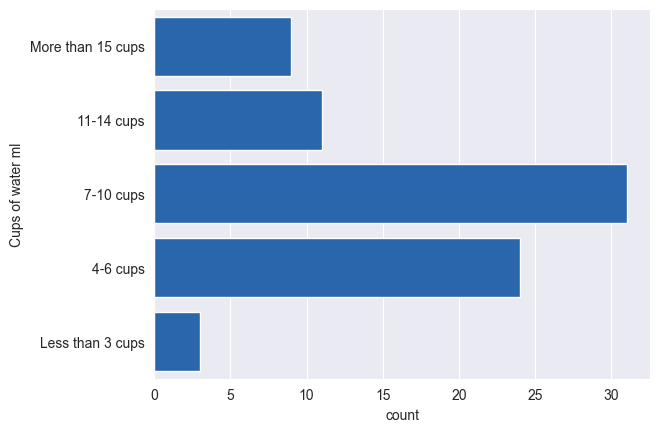

In [67]:
# Consumption of water
water_consumption = 'What is your water consumption like (in a day, 1 cup=250ml approx)'

# Change names of column
short_name_water ={water_consumption: "Water"}

# Transforming in long format
water_consumtion_long = dietary_habits_df.melt(value_vars=water_consumption, var_name="Consumption", value_name="Cups of water ml")

# Replacing long names
water_consumtion_long['Consumption'] = water_consumtion_long['Consumption'].map(short_name_water)

# Graph by frecuency
sns.countplot(data=water_consumtion_long, y='Cups of water ml')
plt.show()

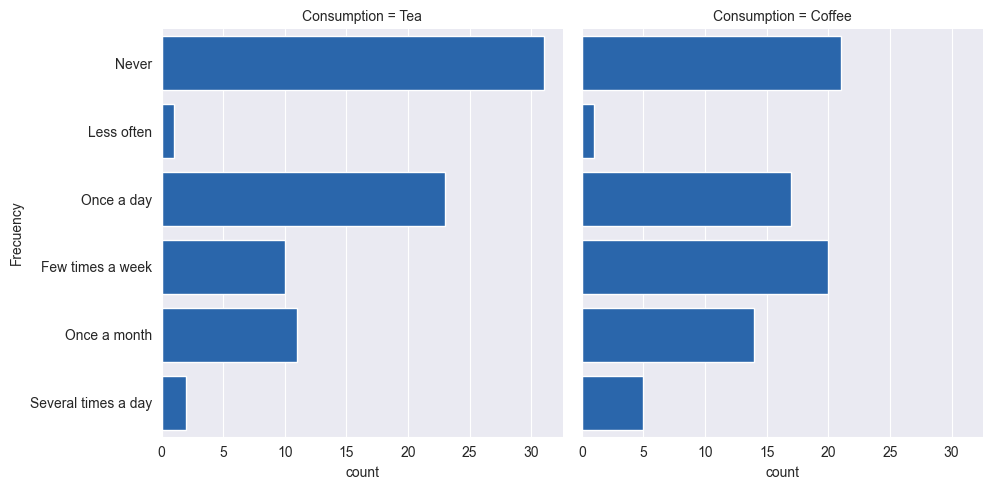

In [68]:
# Consumption of tea and coffee
beverages = ['How frequently do you consume these beverages [Tea]',
                'How frequently do you consume these beverages [Coffee]']

# Change names of columns
short_names_beverages ={
    beverages[0]: "Tea",
    beverages[1]: "Coffee"}

# Transforming in long format
beverages_long = dietary_habits_df.melt(value_vars=beverages, var_name="Consumption", value_name="Frecuency")

# Replacing long names
beverages_long['Consumption'] = beverages_long['Consumption'].map(short_names_beverages)

# Graph by frecuency
sns.catplot(data=beverages_long, y='Frecuency', kind='count', col='Consumption', col_wrap=2)
plt.show()

##### Frecuency of consumption of Unhealthy beverages

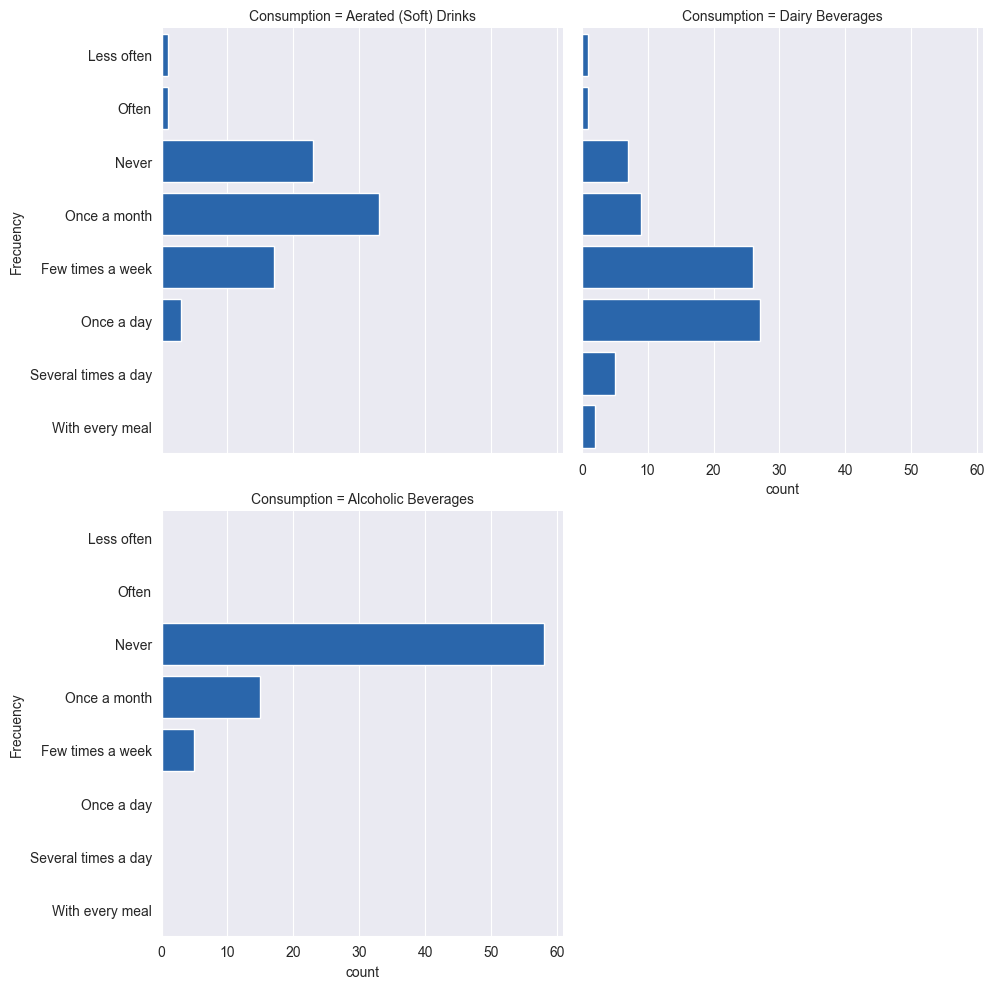

In [50]:
# Names of original columns
unhealthy_beverages = [
    'How frequently do you consume these beverages [Aerated (Soft) Drinks]',
    'How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]',
    'How frequently do you consume these beverages [Alcoholic Beverages]']

# Change name of columns by short names
short_name_col_un = {
    unhealthy_beverages[0]: "Aerated (Soft) Drinks",
    unhealthy_beverages[1]: "Dairy Beverages",
    unhealthy_beverages[2]: "Alcoholic Beverages"}

# Transform in long format
unhealthy_beverages_long = dietary_habits_df.melt(value_vars=unhealthy_beverages, var_name='Consumption', value_name='Frecuency')

# Replacing long names
unhealthy_beverages_long['Consumption'] = unhealthy_beverages_long['Consumption'].map(short_name_col_un)

# Graph
sns.catplot(data=unhealthy_beverages_long, y='Frecuency', kind='count', col='Consumption', col_wrap=2)
plt.show()

##### Frecuency of consumption of Unhealthy foods

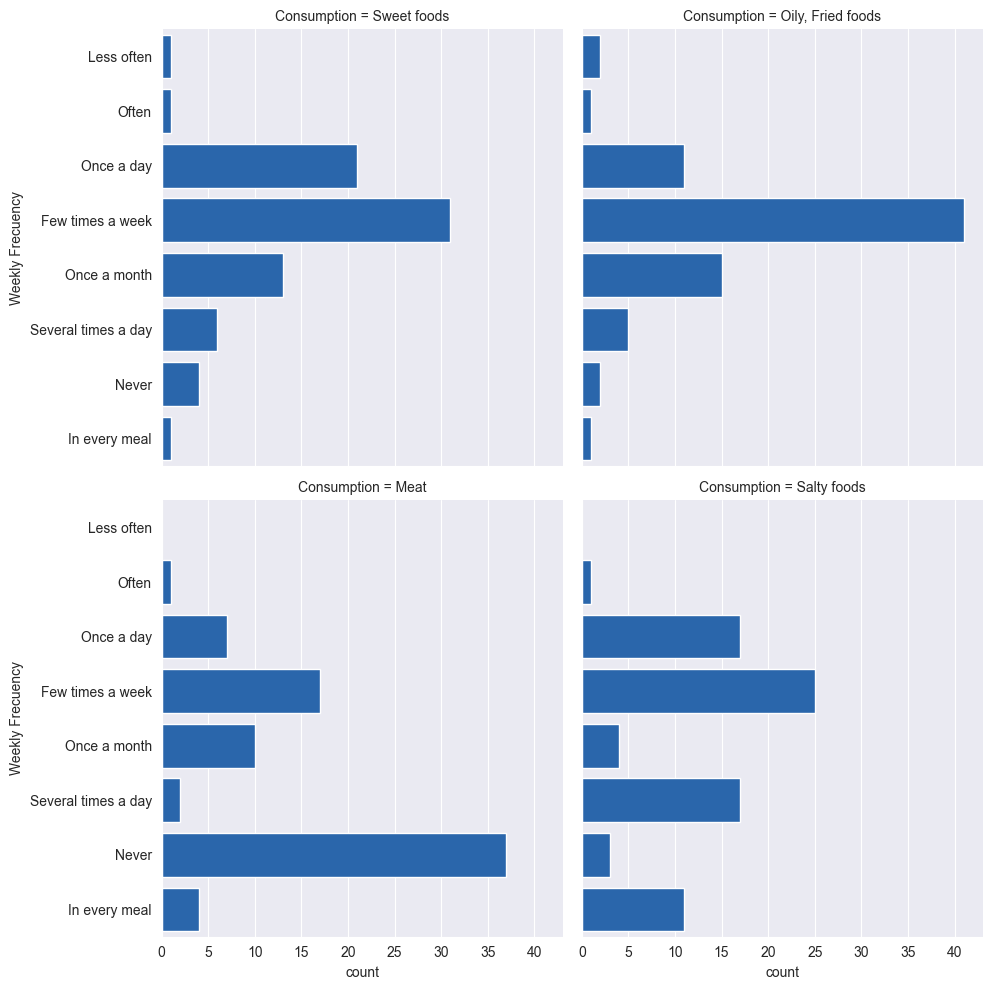

In [51]:
# Names of original columns
unhealthy_foods = [
    'What is your weekly food intake frequency of the following food categories: [Sweet foods]',
    'What is your weekly food intake frequency of the following food categories: [Oily, fried foods]',
    'What is your weekly food intake frequency of the following food categories: [Meat]',
    'What is your weekly food intake frequency of the following food categories: [Salty foods]']

# Change name of columns by short names
short_name_food = {
    unhealthy_foods[0]: "Sweet foods",
    unhealthy_foods[1]: "Oily, Fried foods",
    unhealthy_foods[2]: "Meat",
    unhealthy_foods[3]: "Salty foods"}

# Transform in long format
unhealthy_foods_long = dietary_habits_df.melt(value_vars=unhealthy_foods, var_name='Consumption', value_name='Weekly Frecuency')

# Replacing long names
unhealthy_foods_long['Consumption'] = unhealthy_foods_long['Consumption'].map(short_name_food)

# Graph
sns.catplot(data=unhealthy_foods_long, y='Weekly Frecuency', kind='count', col='Consumption', col_wrap=2)
plt.show()

#### Disposable income and N° family members

In [52]:
# Create disposable income column
income_expenditure_df['disposable_income'] = income_expenditure_df['Mthly_HH_Income'] - income_expenditure_df['Mthly_HH_Expense']

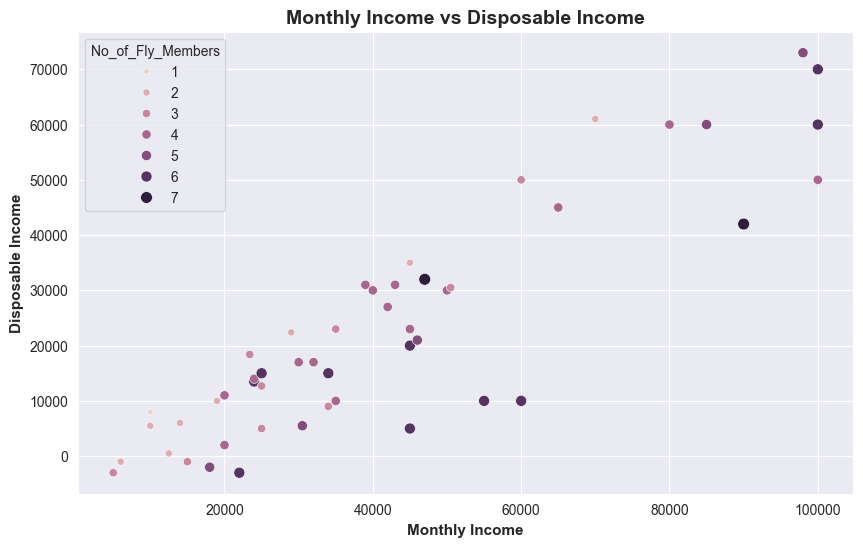

In [53]:
# Graph of income and disposable income
plt.figure(figsize=(10,6))
sns.scatterplot(data=income_expenditure_df, x='Mthly_HH_Income', y='disposable_income', hue='No_of_Fly_Members' 
                ,size='No_of_Fly_Members')
plt.title('Monthly Income vs Disposable Income', fontsize=14, weight="bold")
plt.xlabel('Monthly Income',fontsize=11, weight="bold")
plt.ylabel('Disposable Income', fontsize=11, weight="bold")
plt.show()

#### Food prices

In [54]:
# Analyze food prices dataset
food_prices_merged = food_prices_df.merge(food_description_df, on='EFPG_code', how='left')

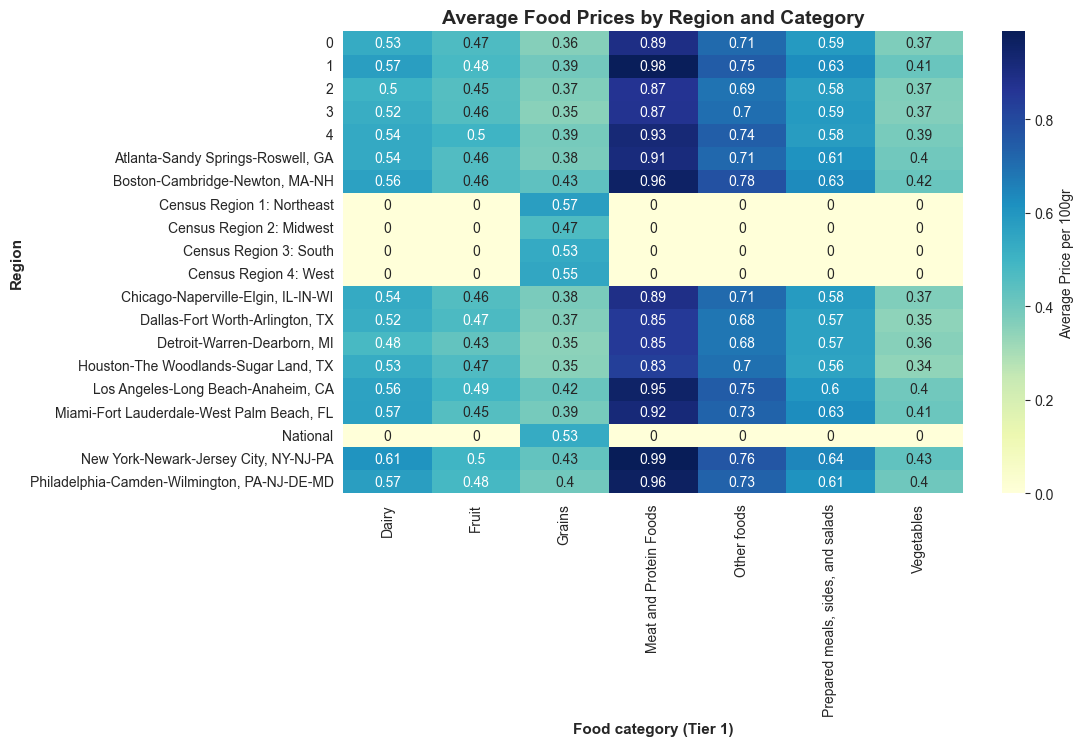

In [55]:
# Regional patterns
food_prices_100gr = food_prices_merged[food_prices_merged['Attribute'] == 'Weighted mean unit value per 100 grams']\
    .groupby(['Metroregion_code','Tier 1 group'])['Value'].mean().reset_index()

# Pivot food prices region
food_prices_df_pivot = food_prices_100gr.pivot_table(values='Value', index='Metroregion_code', columns='Tier 1 group', fill_value=0)

# Heatmap of region by category of foods
plt.figure(figsize=(10,6))
sns.heatmap(food_prices_df_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label':'Average Price per 100gr'})
plt.title("Average Food Prices by Region and Category", fontsize=14, weight='bold')
plt.xlabel("Food category (Tier 1)", fontsize=11, weight='bold')
plt.ylabel("Region", fontsize=11, weight='bold')
plt.show()

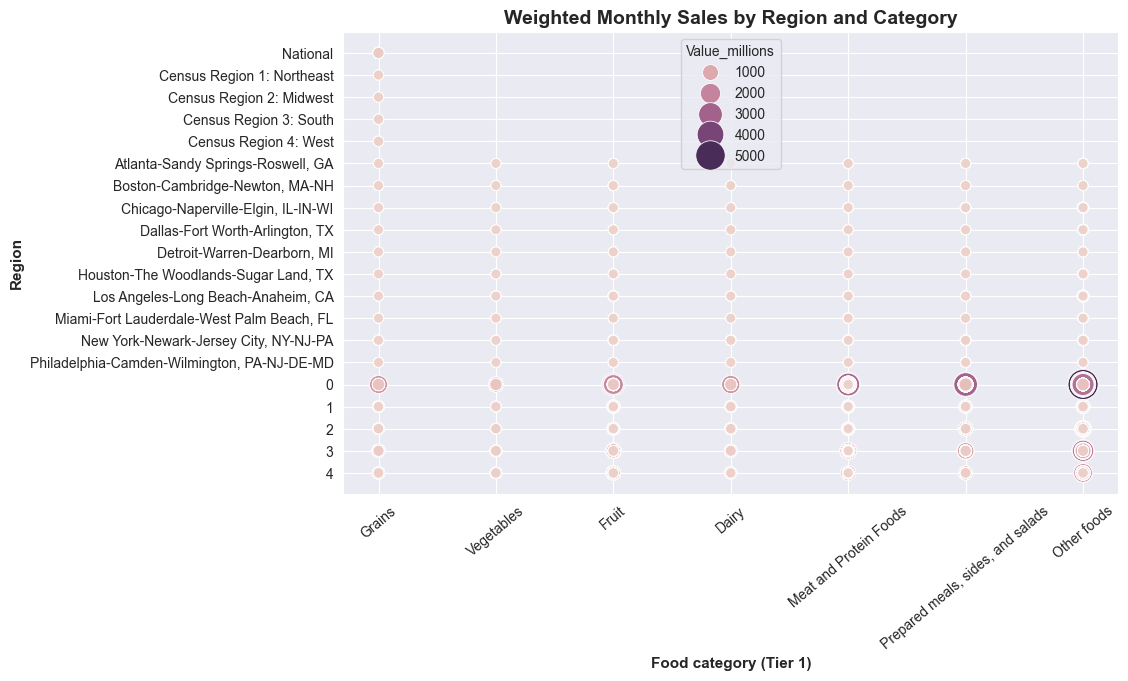

In [56]:
# Total weighted monthly sales category
food_prices_monthly_sales = food_prices_merged[food_prices_merged['Attribute'] == 'Total weighted monthly sales in U.S. dollars']
food_prices_monthly_sales_df = food_prices_monthly_sales.copy()

# Create value column in millions
food_prices_monthly_sales_df['Value_millions'] = food_prices_monthly_sales_df['Value']/1000000

# Groupping by metroregion_code and tier1 group
food_prices_sales_group = food_prices_monthly_sales_df.groupby(['Metroregion_code','Tier 1 group'])['Value_millions']\
    .mean().reset_index()

# Pivot food prices by region
food_prices_group_one = food_prices_sales_group.pivot_table(values='Value_millions'\
                                                            ,index='Metroregion_code', columns='Tier 1 group', fill_value=0)

# Heatmap of region by category of foods price monthly sales
plt.figure(figsize=(10,6))
sns.scatterplot(data=food_prices_monthly_sales_df, x='Tier 1 group', y='Metroregion_code', hue='Value_millions', size='Value_millions',\
                sizes=(50,500))
plt.title("Weighted Monthly Sales by Region and Category", fontsize=14, weight='bold')
plt.xlabel("Food category (Tier 1)", fontsize=11, weight='bold')
plt.ylabel("Region", fontsize=11, weight='bold')
plt.xticks(rotation=40)
plt.show()

In [57]:
food_prices_quantities = food_prices_merged[food_prices_merged['Attribute'] == 'Total weighted monthly quantities in grams']\
    .groupby(['Metroregion_code','Tier 1 group'])['Value'].mean().reset_index()
# Pivot food prices by region
food_prices_group_two = food_prices_quantities.pivot_table(values='Value'\
                                                            ,index='Metroregion_code', columns='Tier 1 group', fill_value=0)
food_prices_group_two

Tier 1 group,Dairy,Fruit,Grains,Meat and Protein Foods,Other foods,"Prepared meals, sides, and salads",Vegetables
Metroregion_code,,,,,,,
0,1.565753e+11,1.475936e+11,6.938185e+10,5.878825e+10,3.765131e+11,2.486984e+11,3.776053e+10
1,3.175378e+10,2.699068e+10,1.365375e+10,1.065367e+10,5.919046e+10,3.855649e+10,6.426010e+09
2,3.782788e+10,2.840576e+10,1.338480e+10,1.084043e+10,8.108737e+10,5.482095e+10,6.914541e+09
3,5.409332e+10,5.436745e+10,2.584814e+10,2.354741e+10,1.558605e+11,9.667627e+10,1.485565e+10
4,3.290527e+10,3.781282e+10,1.649630e+10,1.374731e+10,8.037325e+10,5.863406e+10,9.564211e+09
"Atlanta-Sandy Springs-Roswell, GA",2.597436e+09,2.657412e+09,1.109525e+09,1.029908e+09,6.490804e+09,4.342483e+09,6.673742e+08
"Boston-Cambridge-Newton, MA-NH",3.040182e+09,3.030594e+09,1.193666e+09,1.105937e+09,5.525023e+09,3.538519e+09,7.257959e+08
Census Region 1: Northeast,0.000000e+00,0.000000e+00,7.185361e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Census Region 2: Midwest,0.000000e+00,0.000000e+00,7.887303e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [58]:
food_prices_unweighted_sales = food_prices_merged[food_prices_merged['Attribute'] == 'Total unweighted monthly sales in U.S. dollars']\
    .groupby(['Metroregion_code','Tier 1 group'])['Value'].mean().reset_index()
# Pivot food prices by region
food_prices_group_three = food_prices_unweighted_sales.pivot_table(values='Value'\
                                                            ,index='Metroregion_code', columns='Tier 1 group', fill_value=0)
food_prices_group_three

Tier 1 group,Dairy,Fruit,Grains,Meat and Protein Foods,Other foods,"Prepared meals, sides, and salads",Vegetables
Metroregion_code,,,,,,,
0,2.736472e+08,2.827512e+08,1.765424e+08,2.684464e+08,5.347126e+08,8.224286e+08,8.186809e+07
1,6.017563e+07,5.691025e+07,3.700674e+07,5.435962e+07,8.725771e+07,1.435631e+08,1.700880e+07
2,5.019258e+07,4.717386e+07,2.998942e+07,4.395054e+07,1.051117e+08,1.632186e+08,1.294662e+07
3,1.033691e+08,1.130595e+08,7.081636e+07,1.127619e+08,2.191634e+08,3.483335e+08,3.336267e+07
4,5.990986e+07,6.560760e+07,3.872992e+07,5.737434e+07,1.231798e+08,1.673134e+08,1.855001e+07
"Atlanta-Sandy Springs-Roswell, GA",5.764517e+06,6.288880e+06,3.616380e+06,5.994544e+06,1.072037e+07,1.816669e+07,1.815505e+06
"Boston-Cambridge-Newton, MA-NH",5.746217e+06,5.968914e+06,3.685678e+06,5.449683e+06,8.596101e+06,1.316499e+07,1.842768e+06
Census Region 1: Northeast,0.000000e+00,0.000000e+00,2.669985e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Census Region 2: Midwest,0.000000e+00,0.000000e+00,2.280698e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [59]:
food_prices_unweighted_quantities = food_prices_merged[food_prices_merged['Attribute']=='Total unweighted monthly quantities in grams']\
    .groupby(['Metroregion_code','Tier 1 group'])['Value'].mean().reset_index()
# Pivot food prices by region
food_prices_group_four = food_prices_unweighted_quantities.pivot_table(values='Value'\
                                                            ,index='Metroregion_code', columns='Tier 1 group', fill_value=0)
food_prices_group_four

Tier 1 group
Metroregion_code


In [60]:
food_prices_store_area = food_prices_merged[food_prices_merged['Attribute']=='Number of stores in geographic area']\
    .groupby(['Metroregion_code','Tier 1 group'])['Value'].mean().reset_index()
# Pivot food prices by region
food_prices_group_five = food_prices_store_area.pivot_table(values='Value'\
                                                            ,index='Metroregion_code', columns='Tier 1 group', fill_value=0)
food_prices_group_five

Tier 1 group,Dairy,Fruit,Grains,Meat and Protein Foods,Other foods,"Prepared meals, sides, and salads",Vegetables
Metroregion_code,,,,,,,
0,45826.985119,38974.897321,38043.105442,35481.920918,52992.249524,54930.309524,26852.296066
1,8199.404762,6832.038690,6807.918367,6087.317177,9142.855238,9226.416667,4783.930124
2,9187.529762,7517.255952,7289.556122,6834.310374,10683.495714,11238.901786,4902.863354
3,19610.483631,17068.346726,16729.969388,15745.998299,23127.614762,24103.702381,11809.872671
4,8829.566964,7557.255952,7215.661565,6814.295068,10038.283810,10361.288690,5355.629917
"Atlanta-Sandy Springs-Roswell, GA",840.013393,755.227679,765.767857,706.595238,958.170476,975.630952,563.310041
"Boston-Cambridge-Newton, MA-NH",773.543155,658.766369,629.343750,576.997449,841.036190,845.988095,473.103520
Census Region 1: Northeast,0.000000,0.000000,6695.464286,0.000000,0.000000,0.000000,0.000000
Census Region 2: Midwest,0.000000,0.000000,6926.892857,0.000000,0.000000,0.000000,0.000000


In [61]:
food_prices_unweight_100gr = food_prices_merged[food_prices_merged['Attribute']=='Unweighted mean unit value per 100 grams']\
    .groupby(['Metroregion_code','Tier 1 group'])['Value'].mean().reset_index()
# Pivot food prices by region
food_prices_group_seven = food_prices_unweight_100gr.pivot_table(values='Value'\
                                                            ,index='Metroregion_code', columns='Tier 1 group', fill_value=0)
food_prices_group_seven

Tier 1 group,Dairy,Fruit,Grains,Meat and Protein Foods,Other foods,"Prepared meals, sides, and salads",Vegetables
Metroregion_code,,,,,,,
0,0.530314,0.466986,0.362623,0.899953,0.695753,0.593929,0.374880
1,0.568436,0.478454,0.394619,0.967885,0.736403,0.633994,0.399642
2,0.505118,0.455157,0.366955,0.870425,0.675469,0.573553,0.370293
3,0.530338,0.454865,0.353915,0.886872,0.681490,0.595908,0.374398
4,0.529364,0.498693,0.383556,0.919625,0.722099,0.582004,0.380244
"Atlanta-Sandy Springs-Roswell, GA",0.531154,0.457559,0.373229,0.908662,0.690268,0.606329,0.396260
"Boston-Cambridge-Newton, MA-NH",0.549763,0.458890,0.433639,0.965662,0.759485,0.628636,0.396914
Census Region 1: Northeast,0.000000,0.000000,0.575066,0.000000,0.000000,0.000000,0.000000
Census Region 2: Midwest,0.000000,0.000000,0.468948,0.000000,0.000000,0.000000,0.000000
